In [2]:
from netCDF4 import Dataset
import xarray as xr
from pyproj import Proj, Transformer, CRS
from pyproj.aoi import AreaOfInterest
import numpy as np
import glob

In [4]:
forcing_path = '/Users/jacobqs/OneDrive - Universitetet i Oslo/budhi_gandaki_input'
#cd_path = forcing_path + '/cell_data.nc'
tair_path = forcing_path + '/temperature.nc'
toposcale_path = glob.glob('/Users/jacobqs/OneDrive - Universitetet i Oslo/budhi_gandaki_input/TopoScale/temperature/*.nc')

cd = Dataset(cd_path, mode = 'r')
x_cd = cd.variables['x'][:]
y_cd = cd.variables['y'][:]
ff = cd.variables['forest-fraction'][:]
cd.close() 

PermissionError: [Errno 1] Operation not permitted: b'/Users/jacobqs/OneDrive - Universitetet i Oslo/budhi_gandaki_input/cell_data.nc'

In [26]:
cd = xr.open_mfdataset(cd_path)

In [40]:
x_min = cd.x.values.min()
x_max = cd.x.values.max()
y_min = cd.y.values.min()
y_max = cd.y.values.max()
x_len = len(cd.x.values)
y_len = len(cd.y.values)

In [49]:
y_min

3058819.9503510175

In [67]:
x_array = np.linspace(x_min, x_max, x_len)
y_array = np.linspace(y_min, y_max, y_len)

xx, yy = np.meshgrid(x_array, y_array)

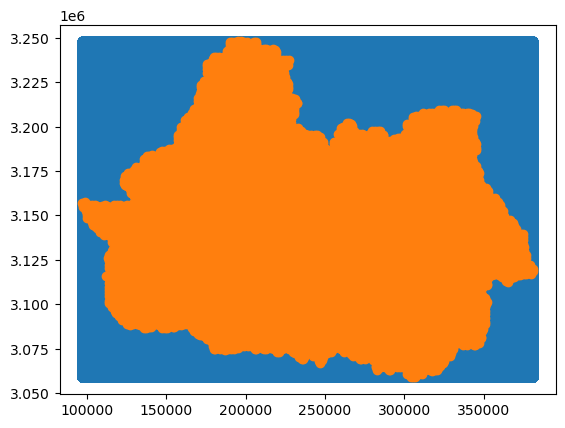

In [69]:
plt.scatter(xx, yy)
plt.scatter(x_cd, y_cd)

In [71]:
x_array[1] - x_array[0]

31.13194983289577

In [65]:
y_array[1] - y_array[0]

20.73986493377015

In [32]:
x_diff = []
y_diff = []

for i in range(len(x)):
    if i == 0:
        pass
    else:
        d_x = x[i] - x[i-1]
        d_y = y[i] - y[i-1]
        x_diff.append(d_x)
        y_diff.append(d_y)

In [34]:
x_mean_diff = np.mean(x_diff)
y_mean_diff = np.mean(y_diff)

In [36]:
y_mean_diff

5.0223894211230675

In [3]:
t = Dataset(tair_path, mode = 'r')
x_t = t.variables['x'][:]
y_t = t.variables['y'][:]
temp = t.variables['temperature'][0][:]
temp_units = t.variables['temperature'].units
t.close() 

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:
## Making a pyproj object for UTM Zone 45N
crs_32645 = CRS.from_epsg(32645)
crs_4326 = CRS.from_epsg(4326)


## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_32645, crs_4326, always_xy = True)

lon_cd , lat_cd = transformer.transform(x_cd, y_cd)
lon_t , lat_t = transformer.transform(x_t, y_t)

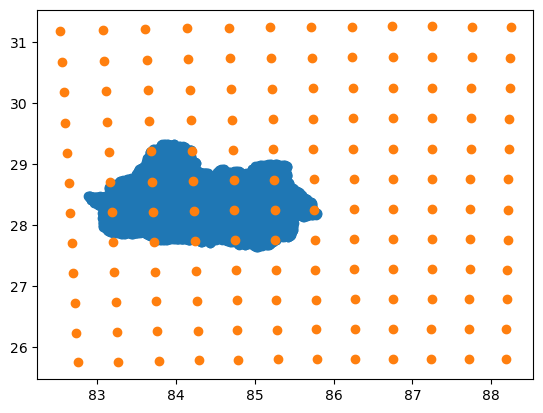

In [63]:
plt.figure()
plt.scatter(lon_cd, lat_cd)
plt.scatter(lon_t, lat_t)
plt.show()

In [50]:
lon_t

array([82.75      , 82.73246595, 82.71442571, 82.69586394, 82.67676461,
       82.65711105, 82.63688582, 82.6160708 , 82.59464707, 82.57259492,
       82.54989382, 82.52652241, 83.26542058, 83.25      , 83.23413408,
       83.2178093 , 83.20101157, 83.18372618, 83.16593781, 83.14763047,
       83.12878752, 83.10939159, 83.08942461, 83.06886774, 83.77702036,
       83.76370255, 83.75      , 83.73590103, 83.72139345, 83.70646455,
       83.69110108, 83.67528921, 83.65901456, 83.64226211, 83.62501623,
       83.60726064, 84.28466435, 84.27343728, 84.26188578, 84.25      ,
       84.23776965, 84.225184  , 84.21223187, 84.19890161, 84.18518106,
       84.17105756, 84.15651793, 84.1415484 , 84.78821794, 84.77906827,
       84.76965414, 84.75996751, 84.75      , 84.73974286, 84.72918697,
       84.71832282, 84.70714049, 84.69562967, 84.6837796 , 84.67157905,
       85.28754685, 85.28045996, 85.27316819, 85.26566532, 85.25794485,
       85.25      , 85.2418237 , 85.23340858, 85.22474695, 85.21

In [7]:
temp_topo = xr.open_mfdataset(toposcale_path)

In [13]:
t = xr.open_mfdataset(tair_path)
t = t.sel(time = '1999')

In [18]:
x_t = t.x.values
y_t = t.y.values
x_topo = temp_topo.x.values
y_topo = temp_topo.y.values


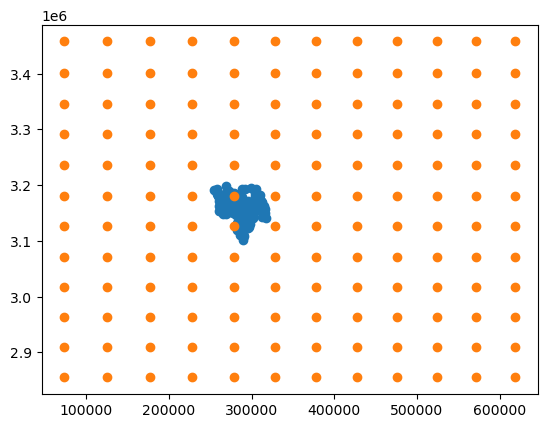

In [21]:
plt.figure()
plt.scatter(x_topo, y_topo)
plt.scatter(x_t, y_t)
plt.show()

In [79]:
topo = xr.open_mfdataset(toposcale_path)

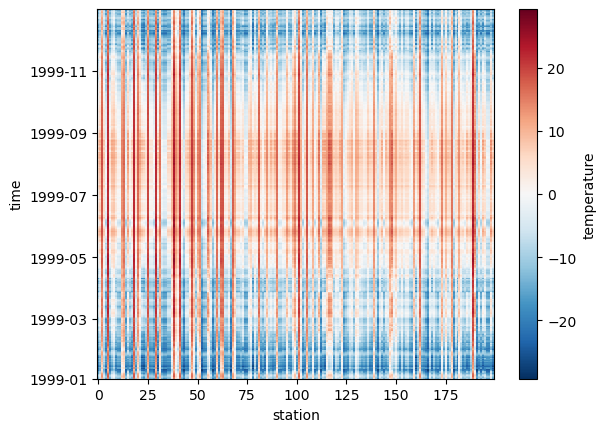

In [84]:
topo.sel(time = '1999').temperature.plot()